In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from haversine import haversine, Unit

In [63]:
path=r'../data/drive-me-not/processed/'
filename=r'spoofed_trace4_unique_cell.csv'
data=pd.read_csv(path+filename) 
data=data[['GPS_lat','GPS_long','lat','lon','spoofed']]
print(data)

        GPS_lat   GPS_long        lat        lon  spoofed
0     25.368868  51.551123  25.369492  51.550598      0.0
1     25.368868  51.551123  25.367661  51.550369      0.0
2     25.368868  51.551123  25.368256  51.557053      0.0
3     25.368868  51.551123  25.366287  51.551102      0.0
4     25.368868  51.551123  25.368494  51.552817      0.0
...         ...        ...        ...        ...      ...
5859  25.386922  51.446212  25.304204  51.513501      1.0
5860  25.386922  51.446212  25.313736  51.517776      1.0
5861  25.386922  51.446212  25.317307  51.520615      1.0
5862  25.386922  51.446212  25.317536  51.527775      1.0
5863  25.386922  51.446212  25.291443  51.530685      1.0

[5864 rows x 5 columns]


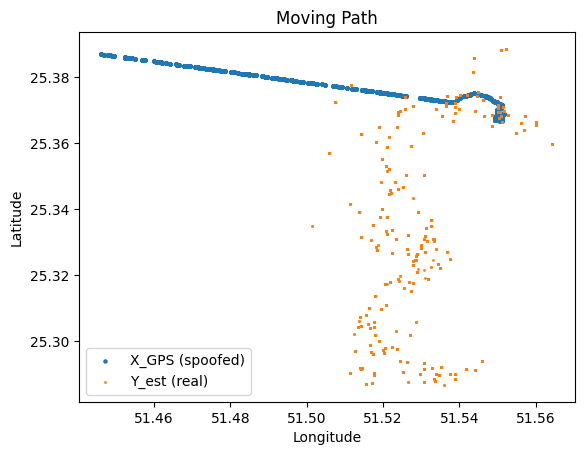

In [64]:
plt.scatter(data['GPS_long'], data['GPS_lat'],s=5,label='X_GPS (spoofed)')
plt.scatter(data['lon'], data['lat'],s=1,label='Y_est (real)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Moving Path')
plt.legend()
plt.show()

In [65]:
data['d_e']=data.apply(lambda row: haversine((row['GPS_lat'],row['GPS_long']),(row['lat'],row['lon'])), axis=1)
#Calculate the impact of different thresholds.
threadshold=np.arange(1,15,0.5,dtype=float)
for th in threadshold:
    name='th_'+str(th)
    data[name]=data.apply(lambda row: row['d_e']>th, axis=1)
data.to_csv('test.csv')
print(data)

        GPS_lat   GPS_long        lat        lon  spoofed        d_e  th_1.0  \
0     25.368868  51.551123  25.369492  51.550598      0.0   0.087150   False   
1     25.368868  51.551123  25.367661  51.550369      0.0   0.154166   False   
2     25.368868  51.551123  25.368256  51.557053      0.0   0.599647   False   
3     25.368868  51.551123  25.366287  51.551102      0.0   0.287040   False   
4     25.368868  51.551123  25.368494  51.552817      0.0   0.175184   False   
...         ...        ...        ...        ...      ...        ...     ...   
5859  25.386922  51.446212  25.304204  51.513501      1.0  11.415968    True   
5860  25.386922  51.446212  25.313736  51.517776      1.0  10.860037    True   
5861  25.386922  51.446212  25.317307  51.520615      1.0  10.761886    True   
5862  25.386922  51.446212  25.317536  51.527775      1.0  11.256133    True   
5863  25.386922  51.446212  25.291443  51.530685      1.0  13.593525    True   

      th_1.5  th_2.0  th_2.5  ...  th_1

In [71]:
def all_is_true(x):
    for i in x:
        if i==False:
            return False
    return True

#Calculate the impact of different bursts length.
burst_length=np.arange(1,20,1,dtype=int)
attack_start_time=np.where(data['spoofed']==1)[0][0]

#An empty 2d data frame to store the result of FP. rows: burst_length, columns: threadshold 
fp_data=pd.DataFrame(columns=threadshold)
#An empty 2d data frame to store the result of time to detect.
detect_time_data=pd.DataFrame(columns=threadshold)

for th in threadshold:
    name='th_'+str(th)
    fp_arr=np.array([])
    detect_time_arr=np.array([])

    for bl in burst_length:
        num_fp=0
        detect_time=data.shape[0]

        for i in range(data.shape[0]-bl+1):
            if all_is_true(data[name][i:i+bl]):
                if i<=attack_start_time:
                    num_fp=num_fp+1
                else:
                    detect_time=i+bl-1
                    break
        fp_rate=num_fp/data.shape[0]
        fp_arr=np.append(fp_arr,fp_rate)
        detect_time_arr=np.append(detect_time_arr,detect_time)

    fp_data[th]=fp_arr
    detect_time_data[th]=detect_time_arr

print(fp_data)

        1.0       1.5       2.0       2.5       3.0       3.5       4.0   \
0   0.179570  0.152456  0.134720  0.112722  0.082026  0.082026  0.067872   
1   0.055082  0.045703  0.039052  0.025409  0.010402  0.010402  0.004945   
2   0.008186  0.005969  0.005969  0.001194  0.000682  0.000682  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000

In [72]:
print(detect_time_data)

      1.0     1.5     2.0     2.5     3.0     3.5     4.0     4.5     5.0   \
0   3146.0  3146.0  3483.0  3483.0  3581.0  3581.0  3581.0  3910.0  3960.0   
1   3153.0  3484.0  3484.0  3652.0  3908.0  3914.0  3917.0  4001.0  4133.0   
2   3467.0  3727.0  3821.0  3885.0  3909.0  3966.0  3996.0  4002.0  4134.0   
3   3500.0  3819.0  3908.0  3908.0  3910.0  4001.0  4002.0  4108.0  4175.0   
4   3501.0  3820.0  3909.0  3909.0  3917.0  4002.0  4021.0  4119.0  4195.0   
5   3583.0  3821.0  3910.0  3910.0  3918.0  4009.0  4022.0  4120.0  4196.0   
6   3822.0  3822.0  3911.0  3911.0  3919.0  4010.0  4023.0  4121.0  4197.0   
7   3870.0  3912.0  3912.0  3920.0  3920.0  4011.0  4024.0  4122.0  4207.0   
8   3888.0  3913.0  3913.0  3921.0  3921.0  4021.0  4100.0  4123.0  4208.0   
9   3889.0  3914.0  3914.0  3922.0  3922.0  4022.0  4101.0  4124.0  4209.0   
10  3912.0  3915.0  3915.0  3923.0  3923.0  4023.0  4124.0  4136.0  4210.0   
11  3913.0  3916.0  3916.0  3924.0  3924.0  4024.0  4125.0  4158

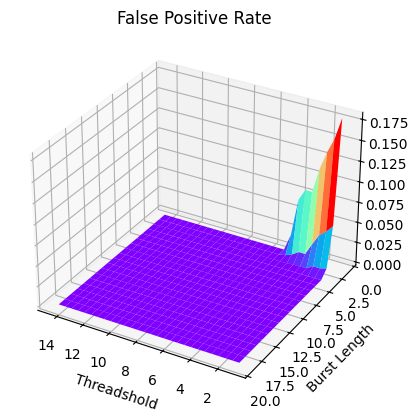

In [79]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, burst_length)
Z = fp_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30, 120)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Burst Length')
ax3.set_zlabel('')
plt.title('False Positive Rate')

plt.show()


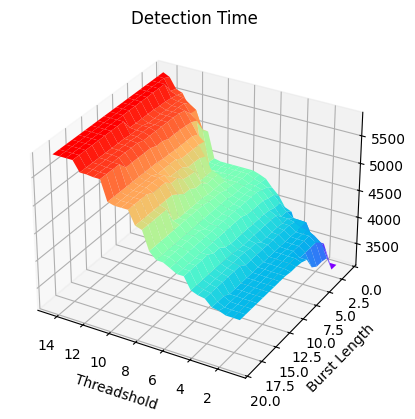

In [80]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, burst_length)
Z = detect_time_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30,120)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Burst Length')
ax3.set_zlabel('')
plt.title('Detection Time')

plt.show()

In [93]:
def sum_larger_than_thredshold(x,th):
    s=0
    for i in x:
        s=s+i
    if s>th:
        return True
    else:
        return False

#Cusum method
threadshold=np.arange(2,132,5,dtype=int)
window_length=np.arange(2,115,5,dtype=int)

#An empty 2d data frame to store the result of FP. rows: window_length, columns: threadshold 
fp_data=pd.DataFrame(columns=threadshold)
#An empty 2d data frame to store the result of time to detect.
detect_time_data=pd.DataFrame(columns=threadshold)

for th in threadshold:
    name='d_e'
    fp_arr=np.array([])
    detect_time_arr=np.array([])

    for wl in window_length:
        num_fp=0
        detect_time=data.shape[0]

        for i in range(data.shape[0]-wl+1):
            if sum_larger_than_thredshold(data[name][i:i+wl],th):
                if i<=attack_start_time:
                    num_fp=num_fp+1
                else:
                    detect_time=i+wl-1
                    break
        fp_rate=num_fp/data.shape[0]
        fp_arr=np.append(fp_arr,fp_rate)
        detect_time_arr=np.append(detect_time_arr,detect_time)

    fp_data[th]=fp_arr
    detect_time_data[th]=detect_time_arr

print(fp_data)

         2         7         12        17        22        27        32   \
0   0.258527  0.022681  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.535471  0.333049  0.152626  0.016712  0.000000  0.000000  0.000000   
2   0.536494  0.507844  0.424454  0.210437  0.023192  0.000000  0.000000   
3   0.536494  0.536494  0.494543  0.427353  0.293145  0.104707  0.020464   
4   0.536494  0.536494  0.516883  0.483799  0.423772  0.333561  0.192872   
5   0.536494  0.536494  0.536494  0.504945  0.468281  0.437926  0.390177   
6   0.536494  0.536494  0.536494  0.521146  0.497783  0.455662  0.433492   
7   0.536494  0.536494  0.536494  0.536323  0.509379  0.493349  0.447817   
8   0.536494  0.536494  0.536494  0.536494  0.523874  0.506651  0.485846   
9   0.536494  0.536494  0.536494  0.536494  0.536494  0.512108  0.502899   
10  0.536494  0.536494  0.536494  0.536494  0.536494  0.526603  0.509379   
11  0.536494  0.536494  0.536494  0.536494  0.536494  0.536494  0.514154   
12  0.536494

In [94]:
print(detect_time_data)

       2       7       12      17      22      27      32      37      42   \
0   3152.0  3910.0  4330.0  4486.0  5105.0  5647.0  5864.0  5864.0  5864.0   
1   3152.0  3158.0  3583.0  3887.0  3911.0  3921.0  4087.0  4178.0  4388.0   
2   3157.0  3157.0  3474.0  3508.0  3822.0  3908.0  3913.0  3914.0  3917.0   
3   3162.0  3162.0  3162.0  3484.0  3511.0  3594.0  3831.0  3896.0  3910.0   
4   3167.0  3167.0  3167.0  3167.0  3484.0  3503.0  3594.0  3696.0  3869.0   
5   3172.0  3172.0  3172.0  3172.0  3177.0  3487.0  3508.0  3583.0  3604.0   
6   3177.0  3177.0  3177.0  3177.0  3177.0  3465.0  3487.0  3510.0  3583.0   
7   3182.0  3182.0  3182.0  3182.0  3182.0  3182.0  3473.0  3499.0  3512.0   
8   3187.0  3187.0  3187.0  3187.0  3187.0  3187.0  3192.0  3483.0  3499.0   
9   3192.0  3192.0  3192.0  3192.0  3192.0  3192.0  3192.0  3458.0  3484.0   
10  3197.0  3197.0  3197.0  3197.0  3197.0  3197.0  3197.0  3197.0  3466.0   
11  3202.0  3202.0  3202.0  3202.0  3202.0  3202.0  3202.0  3202

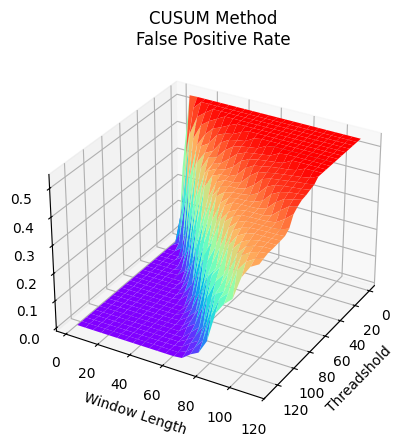

In [99]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, window_length)
Z = fp_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30, 30)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Window Length')
ax3.set_zlabel('')
plt.title('CUSUM Method\n False Positive Rate')

plt.show()

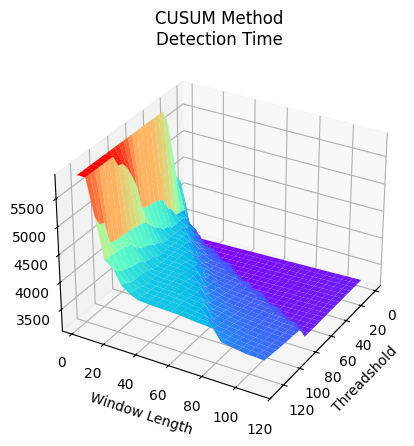

In [100]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')

X, Y = np.meshgrid(threadshold, window_length)
Z = detect_time_data

ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1, cmap='rainbow')
ax3.view_init(30,30)

ax3.set_xlabel('Threadshold')
ax3.set_ylabel('Window Length')
ax3.set_zlabel('')
plt.title('CUSUM Method\n Detection Time')

plt.show()